# Introduction to Classification with Neural Networks in Tensorflow

In [1]:
# import tensorflow


import tensorflow as tf
#import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.3.0


# Classification with Neural Networks in Tensorflow

### A Classification is where you try to classify something as one thing or another.


### A few types of classification problems:

##### Binary Classification
##### Multiclass Classification
##### Multilabel Classification


In [2]:
## Creating data to view and fit

from sklearn.datasets import make_circles


# make 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)



In [3]:
# check out features

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# check the labels

y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
# check the labels

y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [6]:
# check the labels

y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int64)

In [7]:
# lets try to change to a Dataframe


circles = pd.DataFrame({'X0': X[:, 0], 'X1':X[:, 1], 'label':y})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


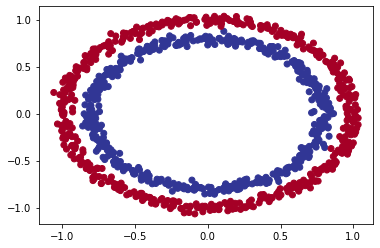

In [11]:
# lets visualize with a plot


plt.scatter(X[:, 0], X[:, 1], c= y,  cmap = plt.cm.RdYlBu);




## Input and Output shapes

In [12]:
# check the shapes of our features and labels


X.shape, y.shape

((1000, 2), (1000,))

In [13]:
# how many samples we are working

len(X), len(y)

(1000, 1000)

In [15]:
# view the first examples of features and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [16]:
# view the few examples of features and labels

X[10], y[10]

(array([-0.64249042, -0.54409929]), 1)

In [18]:
X[995], y[995]

(array([0.2440541 , 0.94412519]), 0)

### steps in modelling



#### steps in modelling with TF are typically


##### 1. Create the model
##### 2. compile the model
##### 3. Fit the model
##### 4. Evaluate the model
##### 5. Tweak the model and Evaluate and Tweak again and evaluate...... 

In [25]:
# set the random seed

tf.random.set_seed(42)


# 1. create the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])



# 2. compile the model

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.SGD(),
               metrics=['accuracy'])


# 3. fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 965us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 966us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 996us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 873us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4820


In [26]:
# lets try and improve our model by training for longer


model_1.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 861us/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 969us/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 939us/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 937us/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 922us/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 934us/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 997us/step - loss: 0.6938 - accuracy: 0.

In [27]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [29]:
'''
Since we are working on a binary classification problem and our model is getting aroung ~50% accuracy.... 
its performing as if it's getting.



So lets step things up a notch and add and extra layer..


'''

"\nSince we are working on a binary classification problem and our model is getting aroung ~50% accuracy.... \nits performing as if it's getting.\n\n\n\nSo lets step things up a notch and add and extra layer..\n\n\n"

In [30]:
# set the random seed

tf.random.set_seed(42)



# 1. create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])



# 2. compile the model

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.SGD(),
               metrics=['accuracy'])


# 3. fit the model
model_2.fit(X, y, epochs = 100, verbose =0)



# 4. evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [31]:
circles['label'].value_counts()

0    500
1    500
Name: label, dtype: int64

### Improving our Model



####### lets look our bag of tricks to see how we can improve our model.


##### 1. Create a model  == we might to add more layers or increase the no. of hidden units within a layer

##### 2. compile the model   ==  here we might to choose a different optimization fun such as ADAM instead of SGD. 

##### 3. fit the model == perhaps we might fit our model for more epochs (leave it training for longer

### Common ways to improve a Deep model :


#####  Adding layers
#####  Increase the no. of hidden units
#####  change the activation funct
##### change the optimization fun
##### change the learning rate
##### fitting on more data
##### fitting for longer

In [32]:
# improving our model 


# set the random seed

tf.random.set_seed(42)



# 1. create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),               # adding 100 dense neurons
    tf.keras.layers.Dense(10),                # adding 10 dense neurons
    tf.keras.layers.Dense(1)
])


# 2. compile the model 
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# 3. fit the model
model_3.fit(X, y, epochs = 100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 2.9658 - accuracy: 0.4490
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.4390
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.43 - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4750
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 940us/step - loss: 0.6946 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 995us/step - loss: 0.6943 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 1ms/st

In [33]:
# 4. evaluate the model

model_3.evaluate(X,y)

32/32 [==============================] - 0s 659us/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [34]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_3.predict(X)

array([[0.4879331 ],
       [0.55887413],
       [0.5629265 ],
       [0.57050604],
       [0.44141006],
       [0.5738814 ],
       [0.5576488 ],
       [0.482467  ],
       [0.4775561 ],
       [0.57502294],
       [0.51484644],
       [0.5308782 ],
       [0.56437737],
       [0.45787287],
       [0.4505265 ],
       [0.46129733],
       [0.5405553 ],
       [0.46380743],
       [0.5479779 ],
       [0.5037538 ],
       [0.50630516],
       [0.5877541 ],
       [0.45902225],
       [0.49123386],
       [0.58321416],
       [0.5704235 ],
       [0.55239445],
       [0.46317366],
       [0.45773247],
       [0.4544093 ],
       [0.47871968],
       [0.5785606 ],
       [0.55546176],
       [0.4633922 ],
       [0.45848906],
       [0.5898657 ],
       [0.57247263],
       [0.52974474],
       [0.458704  ],
       [0.51093006],
       [0.49993864],
       [0.5463095 ],
       [0.5109874 ],
       [0.45797256],
       [0.5223242 ],
       [0.5388774 ],
       [0.44872168],
       [0.544

#### to visualize our  model's prediction lets create a function 'plot_decision_boundary()' this func will :


##### Take a trained model, features (X) and labels (y)
##### create a numpy meshgrid of different X values
##### make predictions accross the meshgrid
##### plot the pred as well as a line b/w zones

In [40]:
def plot_decision_boundary(model,X,y):
    '''
    plot the decision boundary created by a model predicting on X
    '''
    
    # Define the axis b'daries of plot and create meshgrid
    x_min, x_max = X[:, 0].min()- 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max,100))
    
    
    # create X values ( we are going to pred these)
    x_in = np.c_[xx.ravel(), yy.ravel()]   # stack 2D arrays togther
    
    # make predictions
    y_pred = model.predict(x_in)
    
    
    # check multi-class
    if len(y_pred[0]) > 1 :
        print('Doing multiclass classification')
        # we have to reshape our pred to get them ready for plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print('Doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # plot the decision boundary
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:,0], X[:, 1], c=y , s =40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

Doing binary classification


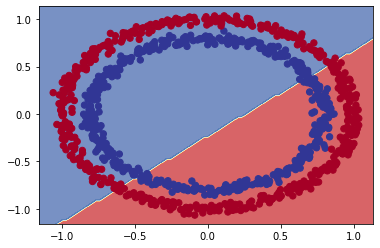

In [41]:
# check out the predictions our model is making

plot_decision_boundary(model=model_3,
                      X=X,
                      y=y)

In [44]:
# lets see if pur model can be used for a regression problem.... 



tf.random.set_seed(42)


#create some regression data
X_regression = tf.range(0, 1000,5)
y_regression = tf.range(100, 1000, 5)    # y = X+100


# split our regression data into training and test sets

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test =  y_regression[150:]


# fit our model to the regression data
model_3.fit (X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape [None, 1]


In [45]:
# setup random seed

tf.random.set_seed(42)


# 1. create the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    
])



# 2. compile the model
model_3.compile(loss= tf.keras.losses.mae,
               optimizer =tf.keras.optimizers.Adam(),
               metrics = ['mae'])


# fit the model 
model_3.fit(X_reg_train, y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 997us/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 997us/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 998us/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 997us/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [=============================

ValueError: x and y must be the same size

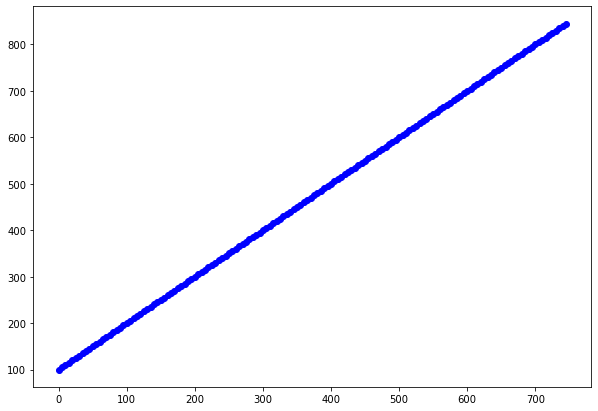

In [48]:
# make predictions with our trained model

y_reg_preds = model_3.predict(X_reg_test)


# plot the model performance againnst regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c ='g', label = 'Test data')
plt.scatter(X_reg_test, y_reg_preds, c ='r', label = 'Predictions')
plt.legend();

### the missing piece : Non-linearity

In [51]:
# set the random seed

tf.random.set_seed(42)


# 1. create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])


# 2. compile the model
model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr=0.001),
               metrics = ['accuracy'])


# fit the model 
model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 686us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 779us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 717us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 717us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 779us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 717us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 748us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 686us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 686us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7419 - accuracy

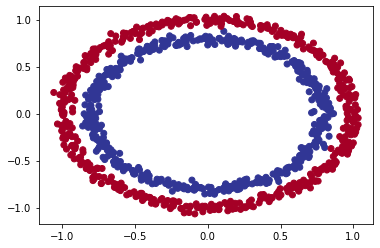

In [52]:
# check out our data


plt.scatter(X[:, 0], X[:, 1], c =y , cmap=plt.cm.RdYlBu)

Doing binary classification


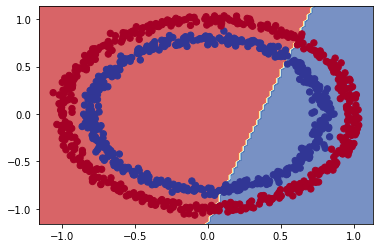

In [53]:
# check the decision boundary for our latest model

plot_decision_boundary(model=model_4,
                      X=X,
                      y=y)

In [54]:
# lets try build our first network with non-linear function



# set random seed

tf.random.set_seed(42)



# 1. create a model with non-linear activation

model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])



# 2. compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])

# 3. fit the model
history= model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 841us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 810us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 841us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 748us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 997us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 810us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 842us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 873us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - ETA: 0s - loss: 2.0027 - accuracy: 0.59

### time to replicate the multi-layer NN from TF playground

In [57]:
# set random seed

tf.random.set_seed(42)


# 1. create the model
model_6= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])


# 2.compile the model
model_6.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# fit the model 
history = model_6.fit(X,y, epochs=250)

Epoch 1/250
32/32 [==============================] - 0s 873us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 904us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 935us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 935us/step - loss: 7.7125 - accuracy: 0.5000
E

In [58]:
# evaluate the model

model_6.evaluate(X,y)

32/32 [==============================] - 0s 655us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Doing binary classification


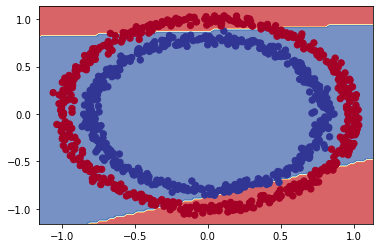

In [59]:
# how to our model predictions 


plot_decision_boundary(model_6, X,y)

In [61]:
# set random seed

tf.random.set_seed(42)


# 1. create the model

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1 , activation= 'sigmoid')
])



# 2 compile the model
model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])


# 3.  fit the model
history = model_7.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 779us/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 717us/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 717us/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 810us/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 779us/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 716us/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 717us/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 686us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 810us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 655us/step - loss: 0.6766 - accura

In [62]:
# 4. evaluate the model

model_7.evaluate(X,y)

32/32 [==============================] - 0s 592us/step - loss: 0.2948 - accuracy: 0.9910


[0.29480040073394775, 0.9909999966621399]

Doing binary classification


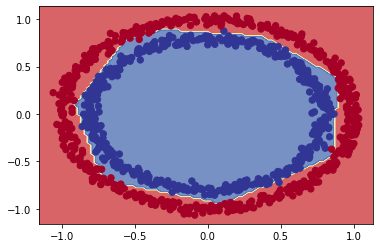

In [63]:
# visulaize the model


plot_decision_boundary(model_7, X,y)

### Create a toy a tensor (similar to the date we pass into our models)

In [64]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

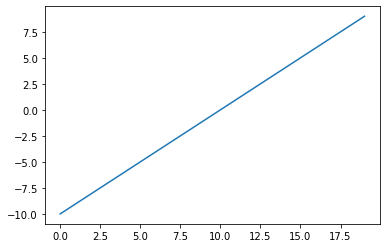

In [65]:
# visualize our toy tensor
plt.plot(A)

In [66]:
# lets start by replicating sigmoid - sigmoid (x) = 1/(1+exp(-X))


def sigmoid(x):
    return 1 / (1+tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

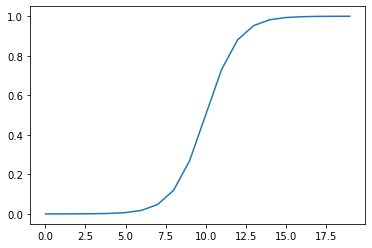

In [67]:
# plot our toy tensor trasformed by sigmoid
plt.plot(sigmoid(A));

In [68]:
# lets recreate the relu function


def relu(x):
    return tf.maximum(0, x)

# pass our toy tensor to our custm relu functon
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [69]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

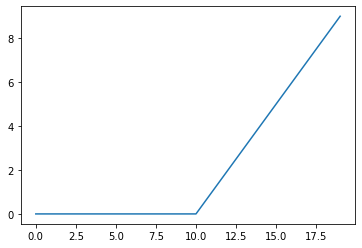

In [70]:
# plot Relu modified tensor
plt.plot(relu(A))

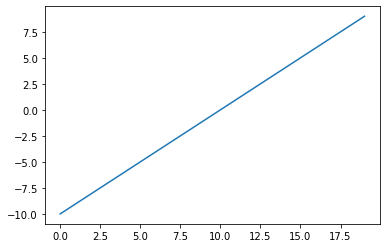

In [71]:
plt.plot(A)

 ### Evaluating and improving our classification
    
    

In [72]:
# check the examples we have

len(X)

1000

In [76]:
# split into train and test sets

X_train, y_train = X[:800], y[:800]

X_test, y_test = X[800:], y[800:]


X_train.shape, X_test.shape, y_train.shape, Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [77]:
# lets recreate the model to fit on the training data and evaluate on the testing data



# set random seed
tf.random.set_seed(42)


# 1. create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


# 2. compile the model
model_8.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])



# fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 755us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 689us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 760us/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 762us/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 798us/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 678us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 742us/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 940us/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 878us/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 918us/step - loss: 0.5714 - accuracy: 0.7738

In [78]:
# 4. evaluate the  model

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 712us/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885359287262, 1.0]

Doing binary classification
Doing binary classification


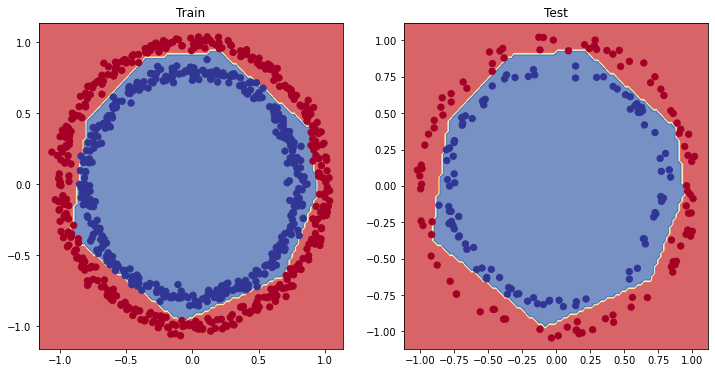

In [79]:
# plot the decision boundaries

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train, y = y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8, X=X_test, y = y_test)
plt.show();

### plot the loss (or training) curve

In [81]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'model_8 loss curves')

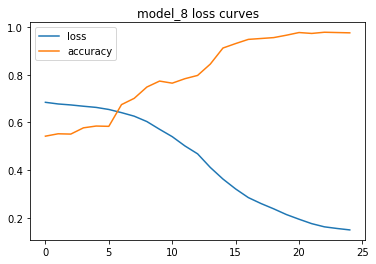

In [82]:
pd.DataFrame(history.history).plot()
plt.title('model_8 loss curves')

### finding the best learning rate

##### to find ideal learning rate (the learning rate where the loss decrease the most during training) we are going to use to foll steps


##### 1. A learning rate **callback** = you can think a callback as an extra piece of functionality you can add to your *while* its training.

##### 2. another model (we could use the same one as above, but we are practising building model here)

##### 3. A modified loss curves plot.

In [86]:
# set random seed

tf.random.set_seed(42)

# Create a model

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


# compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# create a leraning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# fit the model (passing lr_scheduler callback)
history_9= model_9.fit(X_train, y_train, epochs=100,
                    callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 718us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 797us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 878us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 758us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 758us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 718us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 758us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 798us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 798us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 918us/step - loss: 0.6871 - accura

<AxesSubplot:xlabel='epochs'>

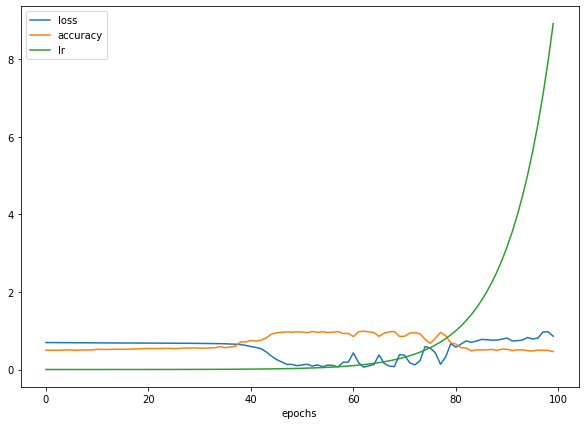

In [87]:
# checkout the history

pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs')

Text(0.5, 1.0, 'learing rate vs loss')

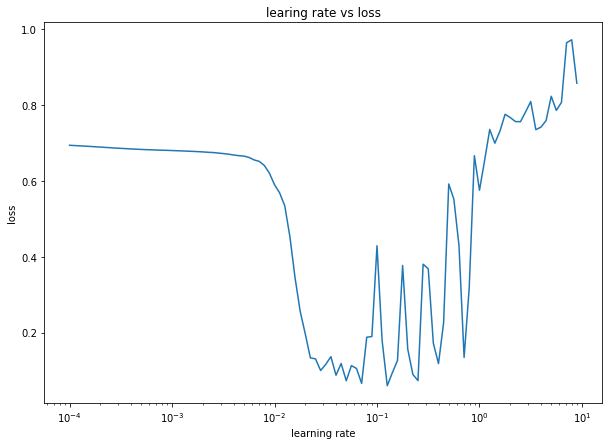

In [89]:
# plot the learning rate versus the loss

lrs = 1e-4 * (10** (tf.range(100)/20))
lrs

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learing rate vs loss')

In [91]:
# example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [92]:
# lets try using a higher ideal learning rate with the same model


# set random seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# compile the model
model_10.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.02),
                metrics=['accuracy'])


# fit the model
history_10 = model_10.fit(X_train,y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 878us/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 798us/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 838us/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 878us/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 997us/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/

In [93]:
# evaluate the model 10

model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 998us/step - loss: 0.0574 - accuracy: 0.9900


[0.05740182846784592, 0.9900000095367432]

In [94]:
# # evaluate the model 8

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885359287262, 1.0]

Doing binary classification
Doing binary classification


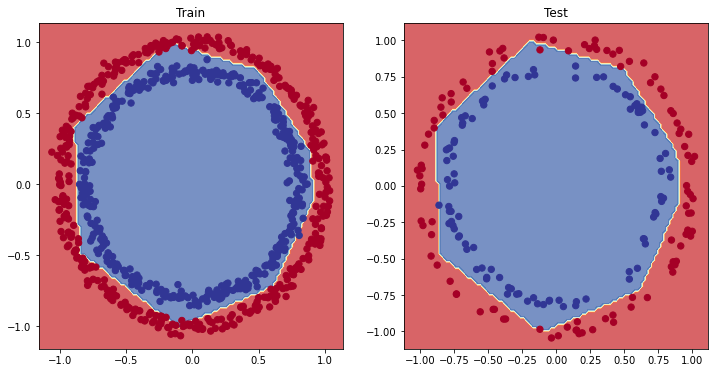

In [95]:
# plot the decision boundary for train and test

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10, X=X_train, y =y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X=X_test, y =y_test)

## Classification Evaluation Methods


##### Accuracy

##### Precision

##### Recall

##### F1 Score

##### Confusion matrix

##### Classification report (from scikit-learn)

In [97]:
# check the accuracy of our model


# Accuracy

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the testset: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):2f} %')


7/7 [==============================] - 0s 1ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the testset: 0.05740182846784592
Model accuracy on the test set: 99.000001 %


In [98]:
# how about confusion matrix ?


# Confusion Matrix
    
from sklearn.metrics import confusion_matrix


# make predictions
y_preds = model_10.predict(X_test)

# create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [99]:
# convert our prediction probabilities to binary format and view it


tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [101]:
# create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]], dtype=int64)

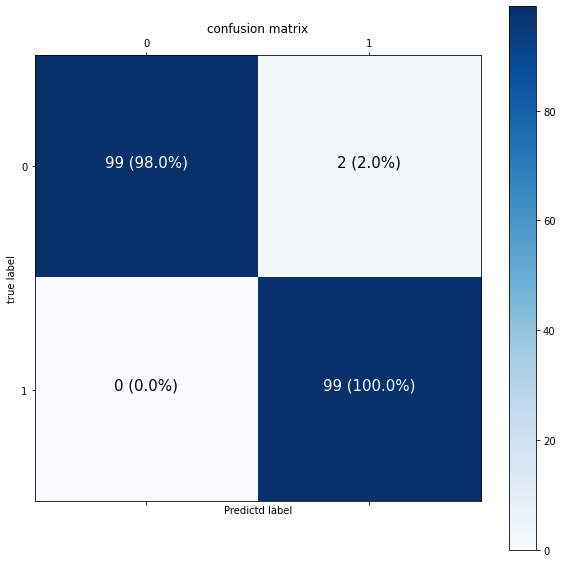

In [109]:
# how about we prettify our confusion matrix ?


import itertools

figsize= (10,10)



# create the confusion matrix

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix

n_classes= cm.shape[0]



# lets prettify it


fig, ax= plt.subplots(figsize=figsize)

# create a matrix plot
cax= ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)


# create classes
classes= False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

    # label the axes
ax.set(title='confusion matrix',
      xlabel = 'Predictd label',
      ylabel = 'true label',
      xticks= np.arange(n_classes),
      yticks= np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)


# set threshold for different colors
threshold = (cm.max() + cm.min()) /2.

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
             horizontalalignment='center',
            color='white' if cm[i,j] > threshold else 'black',
            size=15)

# Working with a Larger example (MultiClass Classification)



### when you have more than 2 classes as an option, its known as **Multi-Class Classification**

In [111]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist



In [112]:

# data has already been sorted into training and test sets for us

(train_data, train_labels ), (test_data, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step


In [113]:
# show the first training example

print(f'Training sample: \n{train_data[0]}\n')
print(f'training label:\n{train_labels[0]}\n')

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [114]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

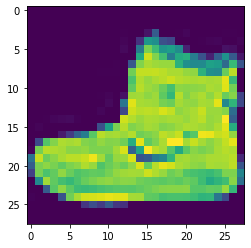

In [116]:
# plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

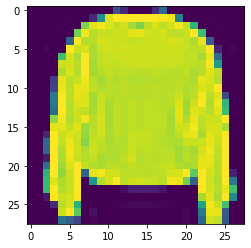

In [117]:
# plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

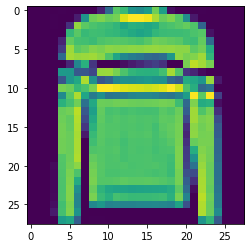

In [118]:
# plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[5]);

In [119]:
# check out samples label

train_labels[7]

2

In [121]:
# create a small list so we can index onto our training labels so they are human-readable


class_names = ['T-shir/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

Text(0.5, 1.0, 'T-shir/top')

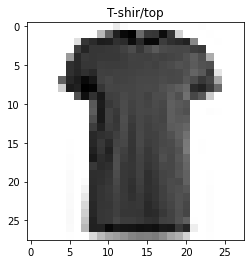

In [122]:
# plot an example image and its label

index_of_choice = 17

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])




Text(0.5, 1.0, 'Trouser')

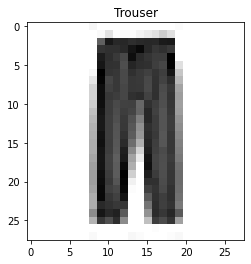

In [123]:
# plot an example image and its label

index_of_choice = 21

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

Text(0.5, 1.0, 'Pullover')

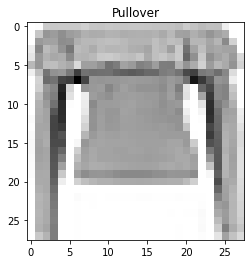

In [124]:
# plot an example image and its label

index_of_choice = 165

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

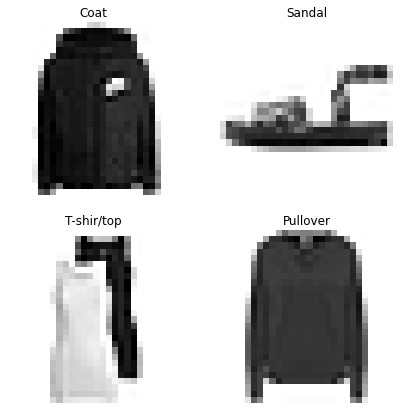

In [125]:
# plot multiple random images of fashion mnist

import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax= plt.subplot(2,2,i+1)
    rand_index= random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
               

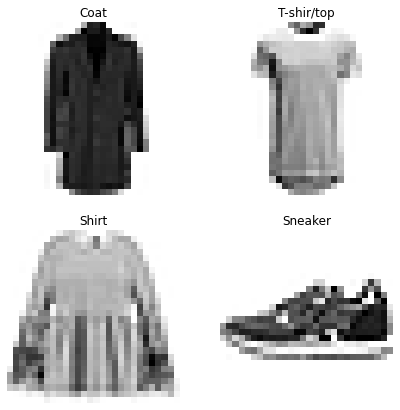

In [126]:
plt.figure(figsize=(7,7))
for i in range(4):
    ax= plt.subplot(2,2,i+1)
    rand_index= random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
               

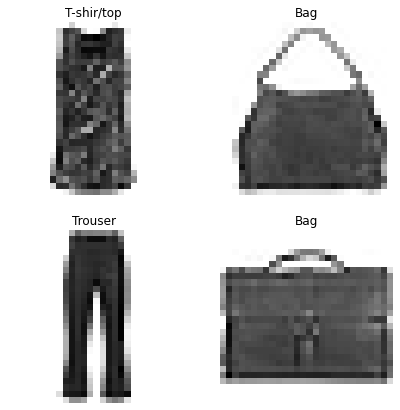

In [127]:
plt.figure(figsize=(7,7))
for i in range(4):
    ax= plt.subplot(2,2,i+1)
    rand_index= random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)
               

## Building a multi-class classification model




#### for our multi-class classification model, we use a similar arch to our binary classifiers, however, we're going to have a tweak a few things:



##### Input shape = 28 x 28 ( the shape of one image

##### Output shape = 10 (one per class of clothing)

##### Loss function = tf.keras.losses.CatergoricalCrossentropy( ) 

##### Output layer activation =  Softmax  (and not Sigmoid, sigmoid is for Binary classification

In [128]:
train_data[0].shape

(28, 28)

In [131]:
28*28


784

In [139]:
# our data needs to be flattened from (28 * 28 to None,784)


flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [140]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [144]:
# Set random Seed

tf.random.set_seed(42)


# 1. create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),          # flatten layer
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])


# 2. compile the model
model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


# 3. Fit the model

non_norm_history = model_11.fit(train_data, train_labels,
                               epochs = 10, 
                               validation_data=(test_data, test_labels))

Epoch 1/10


ValueError: in user code:

    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\e3015558\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


In [146]:
# Set random Seed

tf.random.set_seed(42)


# 1. create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),          # flatten layer
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax)
])


# 2. compile the model
model_11.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


# 3. Fit the model

non_norm_history = model_11.fit(train_data, train_labels,
                               epochs = 10, 
                               validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 - val_accuracy:

In [147]:
# Set random Seed

tf.random.set_seed(42)


# 1. create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),          # flatten layer
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax)
])


# 2. compile the model
model_11.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


# 3. Fit the model

non_norm_history = model_11.fit(train_data, tf.one_hot(train_labels,depth=10),
                               epochs = 10, 
                               validation_data=(test_data, tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 - val_accuracy:

In [148]:
# check the model summary

model_11.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_75 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_76 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [150]:
# check the min and max values of training data

train_data.min(), train_data.max()

(0, 255)

In [ ]:
# we can get 

In [151]:
# our training and testing data between 0 and 1 by dividing by the maximum


train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0



# check min and max values of scaled training data

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [155]:
# now our data is normalized, lets build a model to find pattern in it



# set random seed
tf.random.set_seed(42)


# 1. create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. compile the model
model_12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# 3. fit the model
norm_history = model_12.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

<AxesSubplot:title={'center':'Normalized data'}>

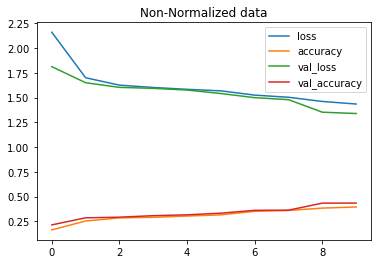

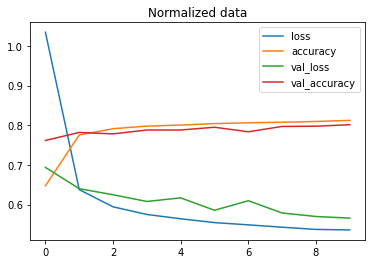

In [156]:
# plot the non-normalized data loss curves

pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized data')

# plot Normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

#### Note:  the same model with even slightly different data can produce dramatically different results. so when you are comparing models, its important to make sure you are comparing them on the same criteria..


## finding the ideal learning rate

In [160]:
# set random seed

tf.random.set_seed(42)


# 1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# 2 compile the model

model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# fit the model
find_lr_history = model_13.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 1s 728us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 2s 806us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 1s 772us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 1s 734us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 1s 725us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 1s 711us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - v

Text(0.5, 0, 'finding the ideal learning rate')

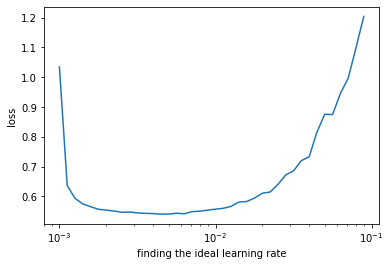

In [162]:
# plot the learning rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.xlabel("finding the ideal learning rate")

In [163]:
# let refit the model with ideal learning rate


# set random seed

tf.random.set_seed(42)


# 1. Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# 2 compile the model

model_14.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])


# Create the learning rate callback
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


# fit the model
history_14 = model_14.fit(train_data_norm,
                              train_labels,
                              epochs=20,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 2s 911us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/20
1875/1875 [==============================] - 2s 980us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/20
1875/1875 [==============================] - 2s 916us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/20
1875/1875 [==============================] - 2s 813us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/20
1875/1875 [==============================] - 2s 908us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/20
1875/1875 [==============================] - 2s 863us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - v

## evaluating our multi-class classification model


#### to evaluate our multi-class classification model we could:

##### evaluate its performance using other classification metrics (such as confusion matrix)

##### assess some of its predictions (thru visualizations)

##### improve its results (by training it for longer or changing the arch)

##### save and export it for use in an app



#### lets go thru top 2



In [164]:
# create a confusion matrix

import itertools

from sklearn.metrics import confusion_matrix



figsize= (10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
    

    # create the confusion matrix

    cm = confusion_matrix(y_true, y_pred)
    cm_norm= cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]  # normalize our confusion matrix

    n_classes= cm.shape[0]



    # lets prettify it


    fig, ax= plt.subplots(figsize=figsize)

    # create a matrix plot
    cax= ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)


    
    # set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

        # label the axes
    ax.set(title='confusion matrix',
          xlabel = 'Predictd label',
          ylabel = 'true label',
          xticks= np.arange(n_classes),
          yticks= np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    
    # set x-axis labels to bottom
    ax.xaxis.set_labels_position('bottom')
    ax.xaxis.tick_bottom()
    
    # adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)


    # set threshold for different colors
    threshold = (cm.max() + cm.min()) /2.

    #plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
                 horizontalalignment='center',
                color='white' if cm[i,j] > threshold else 'black',
                size=text_size)

In [165]:
class_names

['T-shir/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [168]:
# make some pred with our model

y_probs = model_14.predict(test_data_norm)

# view the 1st 5 pred

y_probs[:5]

array([[8.9690988e-10, 5.1861118e-08, 8.0163300e-06, 6.0599887e-06,
        1.0200269e-05, 5.6291662e-02, 6.6273458e-08, 6.1132293e-02,
        1.8405735e-03, 8.8071102e-01],
       [1.3786008e-05, 2.0895006e-17, 9.0092188e-01, 2.5244167e-06,
        6.0517255e-02, 8.8984225e-15, 3.8337883e-02, 1.5817463e-30,
        2.0672458e-04, 1.8360635e-21],
       [1.0579984e-04, 9.8654872e-01, 6.2062040e-06, 1.3050229e-02,
        1.8633090e-04, 3.4911592e-12, 9.8731194e-05, 1.9822528e-08,
        3.5131432e-06, 3.2814731e-07],
       [2.7034803e-06, 9.9445629e-01, 1.9696731e-06, 5.1296116e-03,
        2.4960126e-04, 2.6996936e-11, 1.7383323e-05, 7.9016831e-07,
        1.9396762e-06, 1.3966275e-04],
       [2.8380233e-01, 1.0506727e-05, 9.5871568e-02, 2.1328496e-02,
        3.7533928e-02, 7.4086977e-13, 5.6125551e-01, 1.4625802e-18,
        1.9764407e-04, 2.5044481e-15]], dtype=float32)

In [166]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [169]:
# convert all of pred prob into integers
y_preds = y_probs.argmax(axis=1)

# view the first 10 pred
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [170]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[860,   7,  17,  63,   2,   0,  38,   0,  12,   1],
       [  3, 952,   4,  29,   5,   4,   3,   0,   0,   0],
       [ 49,   4, 651,  12, 172,   2,  99,   0,  11,   0],
       [ 84,  19,  11, 823,  22,   1,  27,   2,  11,   0],
       [  5,   1,  96,  41, 762,   3,  87,   0,   5,   0],
       [  0,   2,   0,   0,   0, 862,   0,  79,   8,  49],
       [257,   5, 142,  47, 142,   5, 389,   0,  13,   0],
       [  0,   0,   0,   0,   0,  23,   0, 919,   1,  57],
       [ 15,   1,  36,  16,   3,   3,   5,   5, 916,   0],
       [  0,   4,   0,   0,   1,   7,   0,  37,   3, 948]], dtype=int64)

AttributeError: 'XAxis' object has no attribute 'set_labels_position'

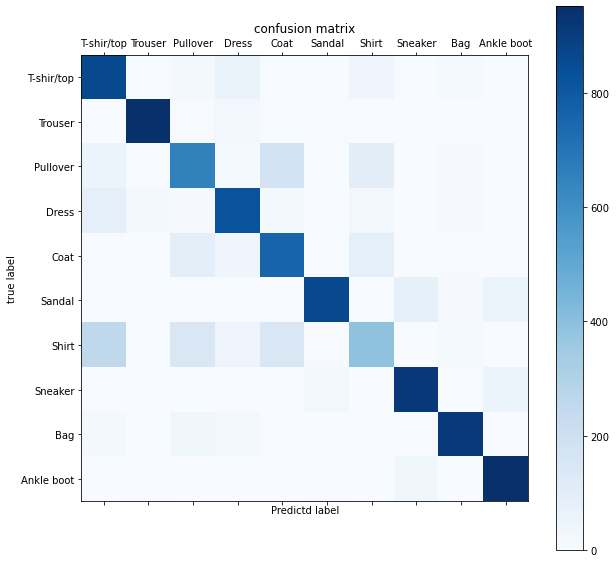

In [172]:
# make a prettier confusion matrix

make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(10,10),
                     text_size=10)

In [175]:
import random


def plot_random_image(model, images, true_labels, classes):
    """
    picks a random image, plot it and labels it with a pred and truth label.
    """
    
    
    # set up random integer
    i = random.randint(0, len(images))
    
    # create pred and targets
    target_image= images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label= classes[pred_probs.argmax()]
    true_label= classes[true_labels[i]]
    
    
    # plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    
    # change the color of the title depending on if the pred
    if pred_label == true_label:
        color= 'green'
    else:
        color = 'red'
        
    # add xlabel info (pred/true label)
    plt.xlabel('Pred: {}{:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
              color=color) # set the color to green or red based if pred is right or wrong

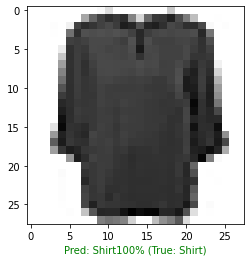

In [176]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data,
                 true_labels=test_labels,
                 classes=class_names)

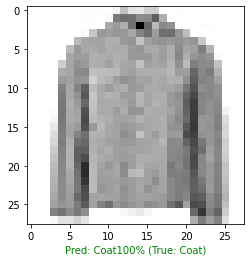

In [177]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data,
                 true_labels=test_labels,
                 classes=class_names)

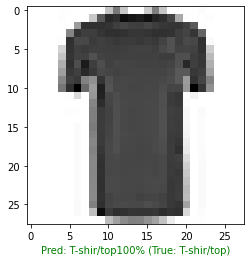

In [178]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data,
                 true_labels=test_labels,
                 classes=class_names)

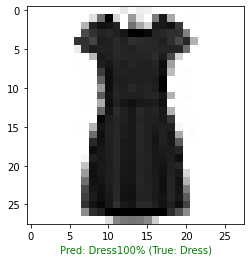

In [179]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data,
                 true_labels=test_labels,
                 classes=class_names)

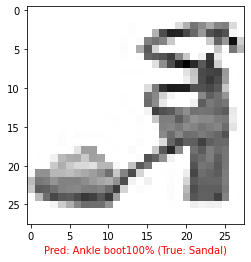

In [180]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data,
                 true_labels=test_labels,
                 classes=class_names)

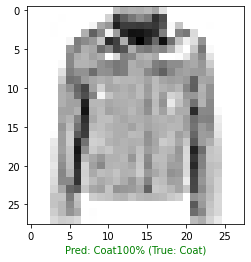

In [181]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data,
                 true_labels=test_labels,
                 classes=class_names)

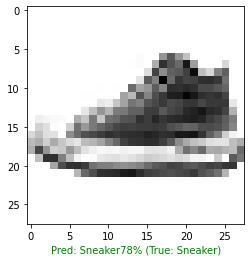

In [182]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

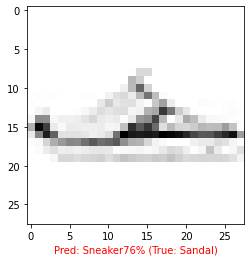

In [183]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

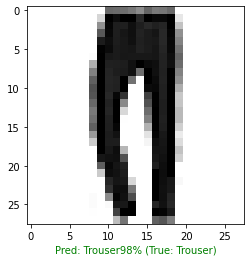

In [184]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

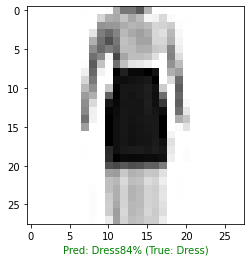

In [185]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

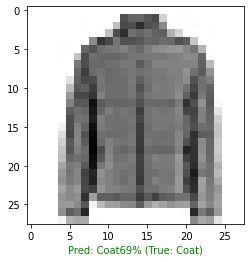

In [186]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

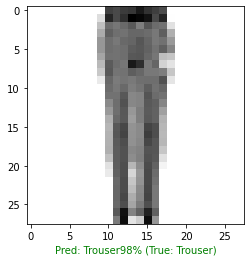

In [187]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

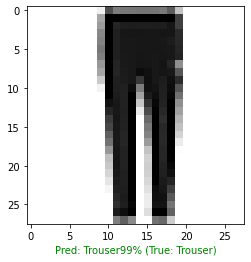

In [188]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

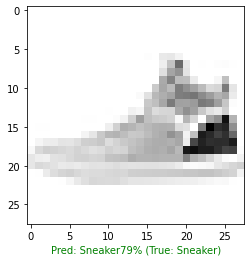

In [189]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

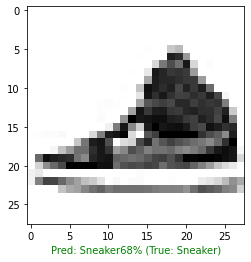

In [190]:
# check out a randim image as wel as its pred


plot_random_image(model= model_14,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

## what patterns is our model learning ?



In [191]:
# find the layers of our most recent model


model_14.layers

In [192]:
model_14.layers[1]

In [193]:
# get the patterns of a layers in our network

weights, biases = model_14.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 3.0888999 , -2.4215217 ,  0.4418051 , -3.0614772 ],
        [ 0.9838694 , -2.7353764 , -0.34102052, -1.1591091 ],
        [ 2.6268573 , -1.6986006 , -2.6450655 , -2.345211  ],
        ...,
        [-0.54319996,  2.1052063 , -0.21971586,  0.74242395],
        [-0.5939364 ,  3.3332582 ,  1.4414951 , -1.5162399 ],
        [ 0.9036092 , -0.6189761 ,  0.6396339 ,  0.06326729]],
       dtype=float32),
 (784, 4))

In [194]:
model_14.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_99 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_100 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [195]:
# bias and biases shapes
biases, biases.shape

(array([ 2.1480203 ,  0.45255148, -0.38970652,  2.9055943 ], dtype=float32),
 (4,))

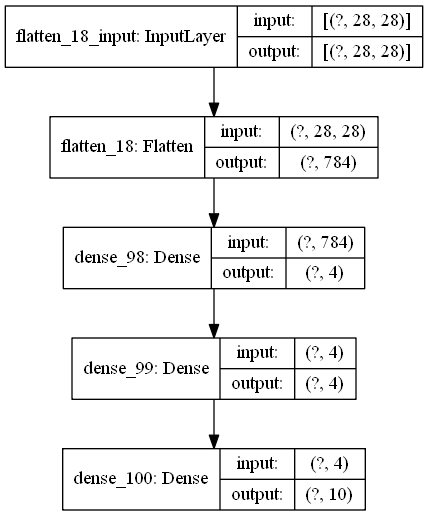

In [196]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)